Linear Regression using single variable 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

using csv 'canada_per_capita_income.csv'

In [3]:
df = pd.read_csv('canada_per_capita_income.csv')

df.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [4]:
# Rename column 'per capita income (US$)' for per_capita_income_US  

df = df.rename(columns={'per capita income (US$)': 'per_capita_income_US'})

display(df.head(5))

,year,per_capita_income_US
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


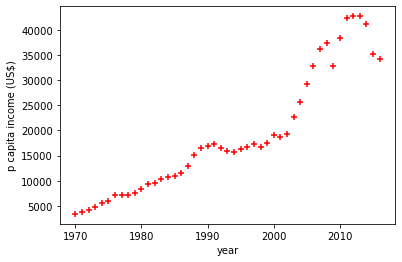

In [5]:
plt.xlabel('year')
plt.ylabel('p capita income (US$)')
plt.scatter(df.year, df.per_capita_income_US, color='red', marker='+')

In [6]:
# df[['year']] return a dataframe
# df['year'] return a serie

In [7]:
reg = LinearRegression()

reg.fit(df[['year']], df.per_capita_income_US)

LinearRegression()

In [8]:
print(reg.predict([['2020']]))

[41288.69409442]


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [9]:
reg.coef_

array([828.46507522])

In [10]:
reg.intercept_

-1632210.7578554575

In [11]:
predicao = 828.46507522 * 2020 + -1632210.7578554575
predicao

41288.694088942604

New data for prediction test

In [12]:
# Creating new data for predict
dict = {'year': ['2019','2020','2021','2022','2023','2024']}

df_new = pd.DataFrame(dict)

df_new

,year
0,2019
1,2020
2,2021
3,2022
4,2023
5,2024


In [13]:
# Storing predictions
new_predict = reg.predict(df_new[['year']])

# Creating a new column for the new predictions
df_new['per_capita_income_US'] = new_predict

display(df_new)

,year,per_capita_income_US
0,2019,40460.229019
1,2020,41288.694094
2,2021,42117.159170
3,2022,42945.624245
4,2023,43774.089320
5,2024,44602.554395


In [14]:
# Turning into a csv
df_new.to_csv('canada_per_capita_income_prediction.csv', index=False)

In [15]:
# Concating old dataframe and new dataframe
df_concat = pd.DataFrame(pd.concat([df, df_new], ignore_index=True))

# Turning into a csv
df_concat.to_csv('df_concat.csv', index=False)

display(df_concat.tail(10))

,year,per_capita_income_US
43,2013,42676.468370
44,2014,41039.893600
45,2015,35175.188980
46,2016,34229.193630
47,2019,40460.229019
48,2020,41288.694094
49,2021,42117.159170
50,2022,42945.624245
51,2023,43774.089320
52,2024,44602.554395
